In [1]:
# Import Libraries
import os
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import calendar

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data Clenup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'], errors='coerce')
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

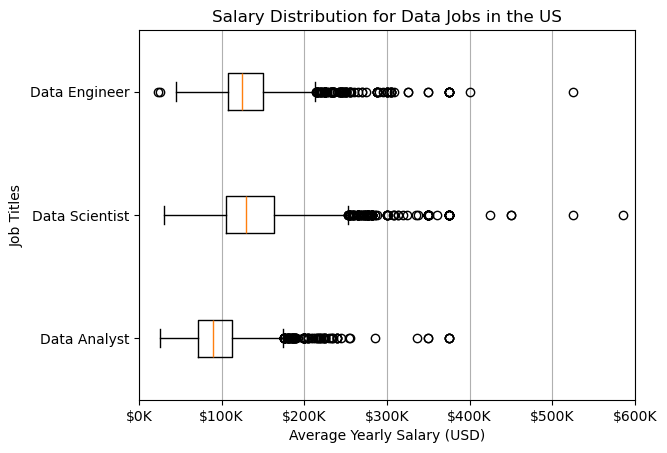

In [27]:
job_titles= ['Data Analyst', 'Data Scientist', 'Data Engineer']

# Filter Data for Specific Job Titles
df_US = df[df['job_title_short'].isin(job_titles) & (df['job_country'] == 'United States')].copy()

df_US = df_US.dropna(subset=['salary_year_avg'])

job_list =[df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

# Plotting Boxplot
plt.boxplot(job_list, tick_labels=job_titles, vert=False)
plt.title('Salary Distribution for Data Jobs in the US')
plt.xlabel('Average Yearly Salary (USD)')
plt.ylabel('Job Titles')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))  # Format x-axis as currency
plt.grid(axis='x')
plt.xlim(0, 600000)  # Set x-axis limit
plt.show()
